# Let's leverage upon prior knowledge and build how to solve regression problems



Some examples ..

Weather below is tricky, the reason it is Discrete is that because problem statement demanded if outcome is Sunny or Cloudy

![ML](images/ml40.png)

Refresher on Slopes and Intercept

![ML](images/ml41.png)

### GOAL  - Minimize Error using Various choice of Algorithms

![ML](images/ml42.png)

** Key Note on why not ABSOLUTE SUM of error & only SQUARED SUM of Errors.

![ML](images/ml43.png)

### SSE Isn't Perfect

If we see below example, Left and Right are two different datasets,
in both situations SSE is doing almost similar job. But if we look at the
numbers, SSE on right is higher, it is only because there are more data points,
so we can't generalize that higher error means worse, as between these two 
sets number of data points are proportional to error score.

![ML](images/ml44.png)

### R-Squared: To get over limitation of SSE, this method proves out to be better choice as it is independent of input points and is very popular, adapted in ML world.

![ML](images/ml45.png)

Note that R2 is only bounded from below by 0 when evaluating a linear regression on its training set. If evaluated on a significantly different set, where the predictions of a regressor are worse than simply guessing the mean value for the whole set, the calculation of R2 can be negative.



![ML](images/ml46.png)

# Multi-Variate Regression

What we looked at thus was one input, however if we have multiple inputs it's called multi-variate

![ML](images/ml47.png)

It is really hard to explain this visually as higher dimensions are hard to perceive, however if we look at below table .. 

Analogy used to compute X1 and X2 are ...

For X1 : as x grows 20 points, y grows 100 points, so coiffecient for x1 = 100/20 = 5

For X2 : as x grows 20 points, y grows 50 points, so coiffecient for x1 = 50/20 = 2.5

And we compute assuming b = 0, we will see that we are over 200 points for every data point, which would make b = -200

![ML](images/ml48.png)

Another example

![ML](images/ml49.png)


In [1]:
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).
    Draws a little scatterplot of the training/testing data
    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../ud120-projects/tools")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../ud120-projects/final_project/final_project_dataset_modified.pkl", "r") )

In [2]:
dictionary['ALLEN PHILLIP K']

{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}

In [3]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
#features_list = ["bonus", "salary"]
## trying instead Long Term Incentive to see if we get better result
features_list = ["bonus", "long_term_incentive"]

data = featureFormat( dictionary, features_list, remove_any_zeroes=True)

In [4]:
data[:1]

array([[ 1200000.,  1586055.]])

In [5]:
# Below is how targetFeatureSplit will generate features and targets
for item in data:
    print "Target", (item[0])
    print "Feature", (item[1:])
    break

Target 1200000.0
Feature [ 1586055.]


In [6]:
target, features = targetFeatureSplit(data)

In [7]:
target[0]

1200000.0

In [8]:
features[0]

array([ 1586055.])

In [9]:
### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
train_color = "b"
test_color = "r"

In [11]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()

reg.fit(feature_train, target_train)

# Make predictions using the testing set
pred = reg.predict(feature_train) #feature_test)

print ("Prediction Score: ", reg.score(feature_test, target_test))

# The coefficients
print('Coefficients, Intercept: \n', reg.coef_, reg.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(feature_train, pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(feature_test, pred))

('Prediction Score: ', -0.59271289994986431)
('Coefficients, Intercept: \n', array([ 1.19214699]), 554478.75621500914)
Mean squared error: 480097942625.02


('Coefficients, Intercept: \n', array([ 0.40364065]), 723040.81741613138)


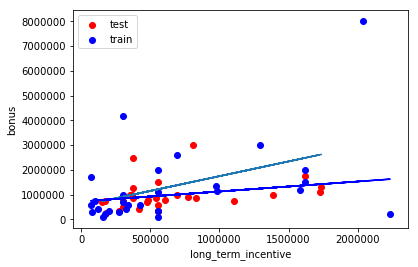

In [12]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
# The coefficients
print('Coefficients, Intercept: \n', reg.coef_, reg.intercept_)
plt.plot(feature_train, reg.predict(feature_train), color="b") 


plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

# Outliers

So we see above that we some outliers like pretty high salary but not that high bonus and vice-versa, we see these data points completely out of the lot.

These have huge impact on predictions, see example below, even if we see a best line in data, becuase of outlier classfier will predict different line to reduce error, which will overall impact accuracy on test ..

![ML](images/ml50.png)

![ML](images/ml51.png)

![ML](images/ml52.png)

### Let's practice the same example with new skill of Outlier Rejection

In [13]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle
#sys.path.append("../ud120-projects/outliers")
#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("../ud120-projects/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("../ud120-projects/outliers/practice_outliers_net_worths.pkl", "r") )

In [14]:
net_worths[0]

316.18428306022463

In [15]:
ages[0]

49

In [16]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

In [17]:
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [18]:

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()

reg.fit(ages_train, net_worths_train)

# Make predictions using the testing set
pred = reg.predict(ages_test) 

print ("Prediction Score: ", reg.score(ages_test, net_worths_test))

# The coefficients
print('Coefficients, Intercept: \n', reg.coef_, reg.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ages_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ages_test, pred))

('Prediction Score: ', 0.87826247036646754)
('Coefficients, Intercept: \n', array([[ 5.07793064]]), array([ 25.21002155]))
Mean squared error: 40061.90
Variance score: -229.92


### Let's remove the outliers, added this code after first run ww/o removing outliers. But we have both plaots before n after 

In [19]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    size=len(ages)
    #print ("Size:", size)
    cleaned_data = []

    ### your code goes here
    errors = predictions - net_worths

    cleaned_data = zip(ages, net_worths, errors)
    cleaned_data = sorted(cleaned_data, key=lambda x: x[2], reverse=True)

    limit = int(len(net_worths) * 0.1)

    return list(cleaned_data[limit:])

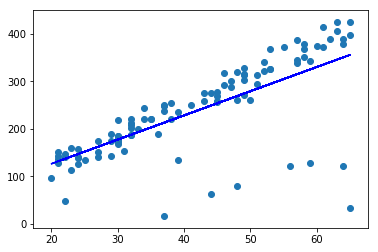

('Revised Coefficients, Intercept: \n', array([[ 6.36859481]]), array([-6.91861069]))


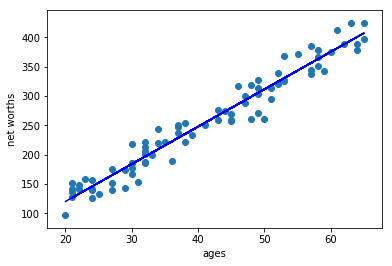

In [20]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"



### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [24]:
print('Revised Coefficients, Intercept:', reg.coef_, reg.intercept_)
print("")
print ("Revised Prediction Score: ", reg.score(ages_test, net_worths_test))

('Revised Coefficients, Intercept:', array([[ 6.36859481]]), array([-6.91861069]))

('Revised Prediction Score: ', 0.98318945539553204)


## Let's look at Enron Outliers

In [25]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../ud120-projects/tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../ud120-projects/final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

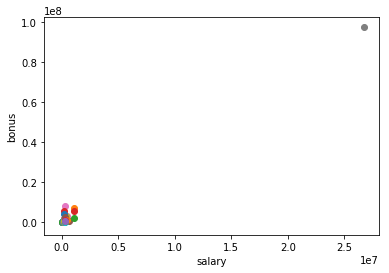

In [26]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [33]:
data_dict['TOTAL']

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

** So it is speardsheet quirk which added Total as Employee with crazy bonus & salary !! - let's remove it**

In [34]:
data_dict.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

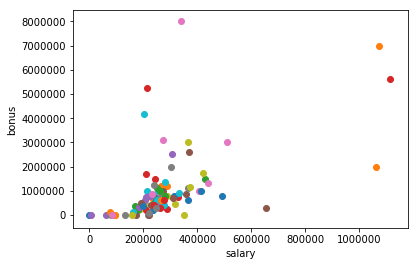

In [35]:
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

** We still see four more outliers, but these are actually real & valid data points, out of whcih below 2 really made money like bandits! **
<br>SKILLING JEFFREY K
<br>LAY KENNETH L